# Twittconomy analyzer #
## Análizador de sentimiento ##

**Twittconomy analizer** es un programa especializado que pretende bajar los twitts de diferentes personas, instituciones, corporaciones, etc. que tienen un gran influencia en los mercados internacionales, con el propósito de determinar como un Twitt puede cambiar la valuación de la acciones en la bolsa. 

**Contexto**
Se presentó el proyecto ante la empresa Twitter, la cual respondió de manera positiva al proyecto debido a que actualmente no existe un programa específico que cubra con esta necesidad. Su respuesta se presenta a continuación.

<img style="float: left; margin: 15px 15px 15px 15px;" src="untitled1.png" title="untitled1" width="250" height="560" />

La primera parte del código es para bajar las librerias necesarias para poder correr el programa. Principalmente tenemos los siguientes:

**Textblob:** es una librería que dan acceso rápido al API que da métodos básicos y fáciles para correr tareas fáciles de proceso de lenguaje natural. Se construye en base de NLTK.  

**Nltk:** es la librería base de Textblob que funciona para cuentiones de investigación. 

**Tweepy:** es la librería principal para hacer análisis de sentimientos en los Twitts considerando las palabras de las personas y las reacciones de las personas que leen los Twitts.

**Pandas:** librería convencional para generar estructuras y análisis de datos. En este caso para apoyar el arreglo matricial.

**Numpy:** Librería que funciona exclusivamente para operaciones matemáticas.

**Seaborn:** es una librería basado en matplotlib, es para generar gráficas especializadas. 

In [3]:
from textblob import TextBlob #libreria que hace el análisis
import nltk #libreria que trabaja el procesamiento de lenguaje natural
nltk.download('punkt')   # esta parte no sé por qué es requerida, 
nltk.download('averaged_perceptron_tagger')   #esta tampoco, pero si no se llaman a ambas, no jala... jaja
import tweepy# librería que trabaja con la API para obtener datos de tweeter
import pandas as pd  #Pandas para hacer dataframes(tablas de datos)
import numpy as np   #numpy para operaciones básicas
import seaborn as sns   #Graficas
import matplotlib.pyplot as plt  #más gráficas

ModuleNotFoundError: No module named 'textblob'

Posterior a esta parte del código se introducen las llaves del API, que son lo accesos a Twitter desde el textblob. 

El consumer key y consumer secret son los códigos del usuario que se integrará a las bases de datos de Twitter mientras que lo Token access son la claves únicas del protal. El secret serian las contraseñas y los que vienen sin secret sería un análogo a los usuarios. 

In [2]:
#En esta parte solo se utilizan las llaves de la API para accceder a los datos de Twitter.

consumer_key = "consumer KEY"

consumer_secret = "Customer Secret" 

access_token = "Access Token"

access_token_secret = "Access_token_secret"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)


NameError: name 'tweepy' is not defined

La siguiente parte del código solamente se colocan diferentes cuentas de twitter que en experiencia, son las que tienen una mayor contribución en la bolsa. Además de tomar temas de la bolsa. Se crea una tabla por medio de un dataframe y se baja el listado directo de un archivo.

In [6]:
#crear dataframe de cuentas de twitter

accounts = pd.read_csv("accounts.csv")
accounts

,Account
0,realDonaldTrump
1,haaretzcom
2,FT
3,ONU_es
4,CNBC
5,nytimes
6,washingtonpost
7,business
8,Tesla
9,JPMAM_UKAdviser


Al igual que en el punto anterior, se genera una tabla en la que se incluye el nombre de las empresas que se encuentran cotizando en la bolsa. En este caso solo se tomaron 5 empresas y solo los encabezados. Se puede hacer de más empresas y más información de cada una.

In [4]:
#Dataframe de acciones
stocks = pd.read_csv("actions.csv")
stocks.head()

,action
0,$FB
1,$AMZN
2,$NFLX
3,$GOOGL
4,$AAPL


A continuación, se define una función llamada analysis, la cual baja los algoritmos del Textblob para permitir operar un analisis de sentimiento. Al final  solamente se indica que el preceso de la API determine un valor. 

In [9]:
#función que hace el análisis de sentimiento de tweet,(Falta crear filtro que omita links y basura no textual, que no nos sirve para el análisis)
def analysis(tweet):
    analysis = TextBlob(tweet) 
    return analysis.sentiment.polarity #Falta documentar cómo funciona esta parte, pero básicamente utiliza una base de datos de adjetivos
                                        # en XMl que tiene una calificación de sentimiento ya sea negativo o positivo,
                                        # de cada frase saca un promedio de esos adjetivos
                                        #https://github.com/sloria/TextBlob/blob/dev/textblob/en/en-sentiment.xml

El siguiente punto es más completo se define tweets, lo que determina que se baje toda la información que existe de Twitter de una direección específica. Dentro de los paréntesis se indica el nombre de la cuenta y la cantidad de twitts que se  van a usar. 

Debajo se define una nueva función que por medio de "Tweets" arregla la información de la persona en una matriz que por matriz donde se consideran diferentes aspectos como el usuario, la dirección del twitt, la longitud la cantidad de likes, la fecha en el que fue escrito, el sentimiento (en la sección del sentimiento se integra la función de "analysis") y la cantidad de retweets.

In [15]:
#crear data frame, que contiene los datos de usuario(tweet, identificación del tweet, longitud del tweet, fecha, likes, retweets y análisis de sentimiento)
tweets = api.user_timeline(screen_name="realDonaldTrump", count=100)
    
def tweets_to_data_frame(tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['tweets'])
        df['user']= np.array(screen_name for tweet in tweets)
        df['id'] = np.array([tweet.id for tweet in tweets])
        df['len'] = np.array([len(tweet.text) for tweet in tweets])
        df['date'] = np.array([tweet.created_at for tweet in tweets])
        df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])
        df['sentiment'] = np.array([round(analysis(tweet.text),2) for tweet in tweets]) 

        return df
    
df= tweets_to_data_frame(tweets)    



df

La función siguiente solo transforma el archivo a Json

In [ ]:
#esta parte convierte el dataframe a un archivo JSON

df.to_json("tweets.json")

En las siguientes líneas, se muestra el análisis de sentimiento impreso, esto solamente es para mostrarse un ejemplo de como se toma la información necesaria por twitt, se presenta la polatidad y la subjetividad de acuerdo a la expresión del individuo. 

In [4]:
#imprimir tweets y su análiss de sentimiento dependiendo de la palabra, hashtag, stocktag... que tú desees.

public_tweets = api.search('$AAPL')     #Elige el tema a imprimir

for tweet in public_tweets:
    print(tweet.text)          #Imprime los tweets
    analysis = TextBlob(tweet.text) 
    print(analysis.sentiment) #imprime el analisis de sentimiento
    print("")
    


RT @charliebilello: % Below 52-week High...
$FB: -40%
$AAPL: -20%
$AMZN: -26%
$NFLX: -36%
$NVDA: -49%
$GOOGL: -20%
Sentiment(polarity=0.16, subjectivity=0.5399999999999999)

$AAPL if $AAPL retraces to 195, 197.5 or 200 area its a gift. It will be 1999 all over again. Or maybe it just keep… https://t.co/aAXPwfjeIn
Sentiment(polarity=0.0, subjectivity=0.0)

RT @charliebilello: % Below 52-week High...
$FB: -40%
$AAPL: -20%
$AMZN: -26%
$NFLX: -36%
$NVDA: -49%
$GOOGL: -20%
Sentiment(polarity=0.16, subjectivity=0.5399999999999999)

ياكثر الاسئله عن $AAPL 

رغم انه سهم غثيث .. 

لكن : سعره اليوم 185$ 

بكرة ممكن عنده ارتداد مع السوق بشكل اجمالي… https://t.co/wO9fVw7MA6
Sentiment(polarity=0.0, subjectivity=0.0)

RT @financialbuzz: Watch Us Report LIVE from the Floor of the NYSE! This weeks weekly wrap-up includes $RHT $IBM $UA $AAPL $FIT $FB $S $GE…
Sentiment(polarity=0.2852272727272727, subjectivity=0.45)

RT @charliebilello: % Below 52-week High...
$FB: -40%
$AAPL: -20%
$AMZN: -26%
$NFLX: -3

Este solamente es una listado de stocks, se pretende meter esta información para procesarla sobre el API de una manera semejante pero puesto en twitts o información verbal. 

In [ ]:
#simbolos de stocks


symbols_pfa = ['A',    'ADI',  'ALB',  'AMD',  'AMT',  'AMZN', 'AOS',  'APD',  'APH',  'AVGO', #1
	       'AVY',  'BA',   'BABA', 'BHGE', 'BWA',  'CAT',  'CME',  'CMI',  'CVX',  'DRI',  #2 
               'EMN',  'FMC',  'GLW',  'HPE',  'HPQ',  'INTC', 'LEG',  'LLY',  'LMT',  'LRCX', #3
               'LYB',  'MCD',  'MDB',  'MDT',  'MCHP', 'MRK',  'MTD',  'MU',   'NKE',  'NFLX', #4
               'ORCL', 'PEP',  'PFE',  'PKI',  'QCOM', 'QRVO', 'SPLK', 'SQ',   'TMO',  'TSLA', #5
               'TDG',  'TIF',  'TPR',  'V',    'WAT',  'WDAY', 'WDC',  'WU']   	               #6    
informationTechnology = ['FB', 'NVDA', 'SWKS', 'ANSS', 'TXN', 'ADBE', 'INTU', 'GOOGL', 'MA', 'CTSH',
                         'EA', 'ACN',  'CDNS', 'AMAT', 'XLNX']
healthCare = ['ISRG', 'ALGN', 'VRTX', 'INCY', 'ILMN', 'CERN', 'REGN', 'EW']
consumerDiscretionary = ['CMG', 'ULTA', 'ROST', 'TSCO', 'GRMN', 'KORS', 'HD', 'SBUX']
consumerStaples = ['MNST', 'HRL', 'CL', 'COST', 'SYY', 'HSY']
industrials = ['FAST', 'EXPD', 'RHI', 'CHRW', 'JBHT', 'MMM']
energy = ['VLO', 'PXD', 'COG', 'XEC']
materials = [ 'IFF']
telecommunicationsServices = ['VZ']
jamesCramer = ['AAPL', 'ABT', 'AMGN', 'APC',   'BP',   'C',    'CMCSA', 'CRM', 'DHR', 'DIS', 
               'DWDP', 'EMR', 'FB',   'GOOGL', 'GS',   'HON',  'ITW',   'JNJ', 'JPM', 'JWN',  
               'KSS',  'MMM', 'MSFT', 'NUE',   'NVDA', 'PYPL', 'RTN',   'SLB', 'TXT', 'UNH',
               'WRK',  'XEC']
cryptos = ['ADAUSDT', 'BCCUSDT', 'BNBUSDT',  'BTCUSDT',  'EOSUSDT', 
           'ETCUSDT', 'ETHUSDT', 'ICXUSDT',  'IOTAUSDT', 'LTCUSDT',
           'NEOUSDT', 'ONTUSDT', 'QTUMUSDT', 'TRXUSDT',  'TUSDUSDT', 
           'VENUSDT', 'XLMUSDT', 'XRPUSDT']
etfs = ['ACWI', 'AGG', 'BKF', 'DBO', 'DIA', 'EPP', 'EEM', 'EWA', 'EWC', 'EWG', 'EWH',   #1
        'EWJ',  'EWT', 'EWU', 'EWQ', 'EWY', 'EWZ', 'EZU', 'FXI', 'IAU', 'IEO', 'IGV',   #2  
        'ILF',  'ITB', 'IYC', 'IYE', 'IYF', 'IYK', 'IYR', 'IYW', 'IWM', 'IYH', 'IYJ',   #3 
        'KBE', 'SLV', 'SHY', 'SPY', 'QQQ',  'XLF',]

Finalmente, se presenta por último una gráfica de sentimiento. Posterior al análisis se determina de una manera dicotómica (+/-) del sentimiento de la persona. Se presenta de manera estadistica por una distribución de cajas donde implican cuartiles y rangos. Entre el número medio se encuentre más hacia lo negativo, el sentimiento es negativo. Así, viceversa. 

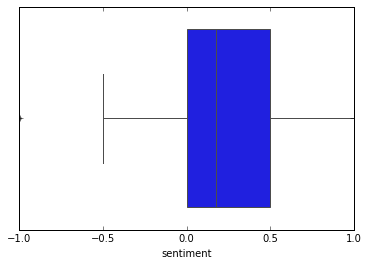

In [26]:
#gráfica del análisis de sentimiento de los ultmos 100 tweets de trump, al parecer tiende a ser positivo el amigo
sns.boxplot(x="sentiment", data=df)
plt.show()